Face Mask and Social Distancing detection using CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Face mask
# ! kaggle datasets download -d andrewmvd/face-mask-detection

In [4]:
# from zipfile import ZipFile
# import os

# # Define the path to the ZIP archive.
# file_name = "/content/face-mask-detection.zip"

# # Create a target directory for extraction.
# target_directory = "/content/drive/MyDrive/mask"
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Open the ZIP archive and extract all species data.
# with ZipFile(file_name, 'r') as zip:
#     # Extract all contents from the ZIP archive to the target directory.
#     zip.extractall(target_directory)

# print('Done')

In [5]:
# Social Distancing
# ! kaggle datasets download -d priteshraj10/detect-social-distancingcovid19

In [6]:
# from zipfile import ZipFile
# import os

# # Define the path to the ZIP archive.
# file_name = "/content/detect-social-distancingcovid19.zip"

# # Create a target directory for extraction.
# target_directory = "/content/drive/MyDrive/social_dis"
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Open the ZIP archive and extract all species data.
# with ZipFile(file_name, 'r') as zip:
#     # Extract all contents from the ZIP archive to the target directory.
#     zip.extractall(target_directory)

# print('Done')

In [7]:
# import os
# import shutil
# import random

# # Set paths to the directories of the two datasets
# face_mask_dataset_path = "/content/drive/MyDrive/mask"  # Change this path to the actual dataset directory
# social_distancing_dataset_path = "/content/drive/MyDrive/social_dis"  # Change this path to the actual dataset directory

# # Define the target directory where you want to merge the datasets
# merged_dataset_path = "/content/drive/MyDrive/merged-dataset"

# # Create the target directory if it doesn't exist
# os.makedirs(merged_dataset_path, exist_ok=True)

# # Copy the Face Mask Detection dataset to the merged directory
# shutil.copytree(face_mask_dataset_path, os.path.join(merged_dataset_path, "FaceMask"))

# # Copy the Social Distancing dataset to the merged directory
# shutil.copytree(social_distancing_dataset_path, os.path.join(merged_dataset_path, "SocialDistancing"))

# # Now you have both datasets in the merged directory

# # If you want to randomly shuffle the data, you can do that too
# # For example, shuffling image files within each class
# for class_dir in os.listdir(merged_dataset_path):
#     class_path = os.path.join(merged_dataset_path, class_dir)
#     if os.path.isdir(class_path):
#         files = os.listdir(class_path)
#         random.shuffle(files)
#         for i, file in enumerate(files):
#             new_name = f"{i + 1:04d}.jpg"
#             os.rename(os.path.join(class_path, file), os.path.join(class_path, new_name))

# # Now the data in the merged dataset is shuffled within each class


In [8]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import random
from IPython.display import Image
import shutil

# EDA

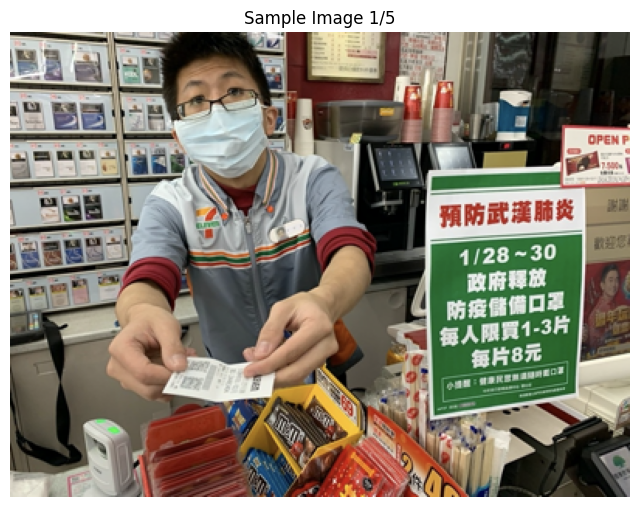

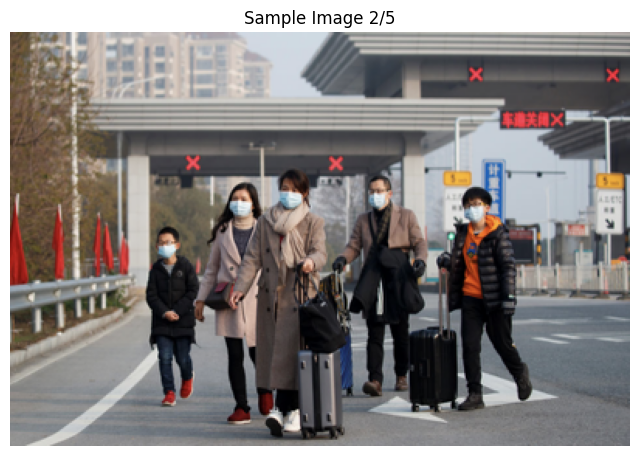

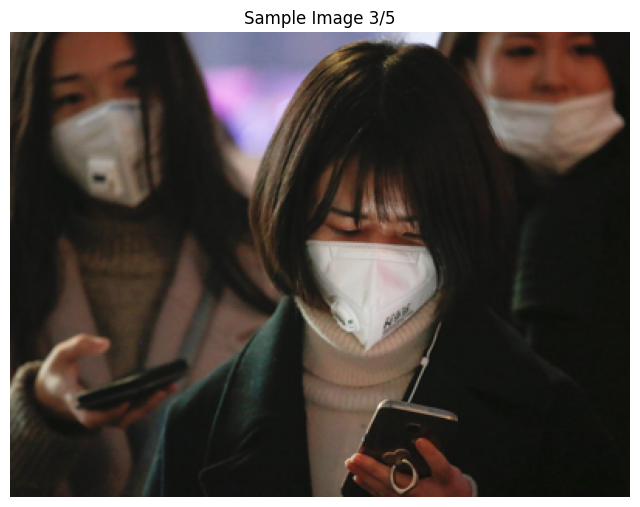

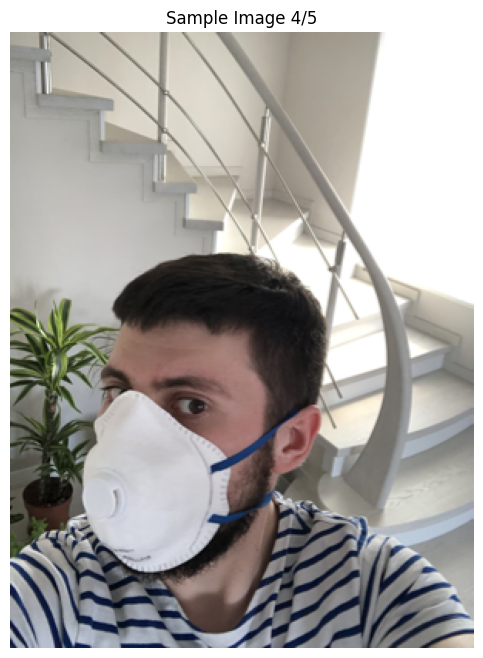

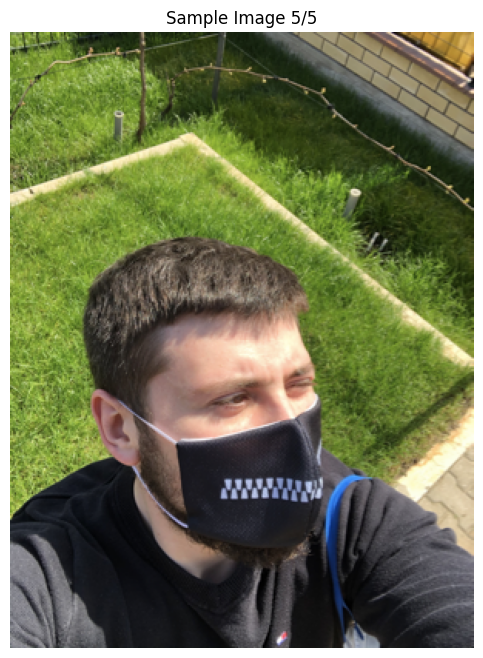

In [9]:
# Sample images without bounding boxes
import os
import cv2
import random
import matplotlib.pyplot as plt

# path to the image folder
image_folder = "/content/drive/MyDrive/mask/images"

# Get the list of image files
image_files = os.listdir(image_folder)

#  number of images to display
num_images_to_display = 5

# Randomly select and display five sample images
for i in range(num_images_to_display):
    random_image_index = random.randint(0, len(image_files) - 1)
    random_image_file = os.path.join(image_folder, image_files[random_image_index])


    image = cv2.imread(random_image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Sample Image {i + 1}/{num_images_to_display}")
    plt.axis('off')
    plt.show()


Sample images with bounding boxes

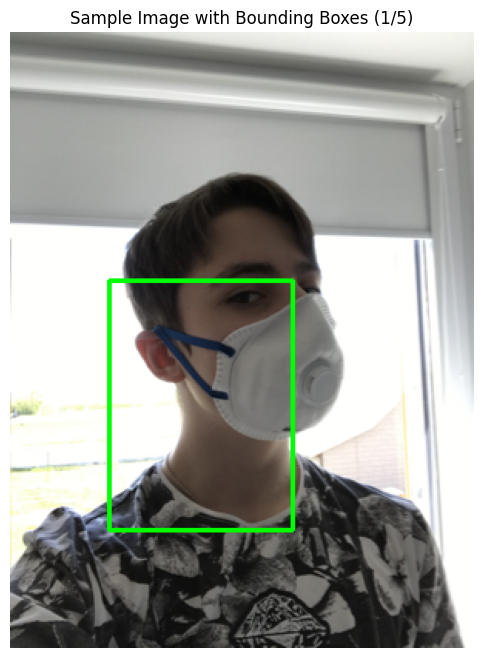

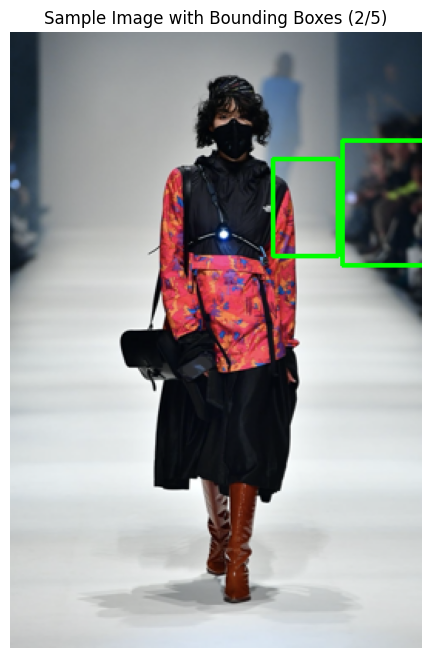

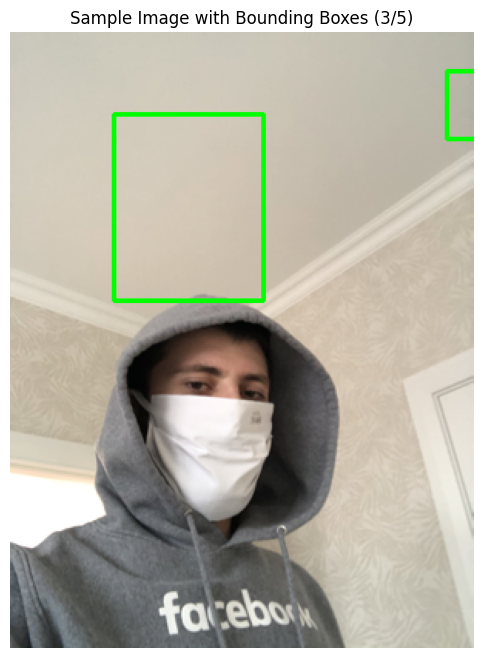

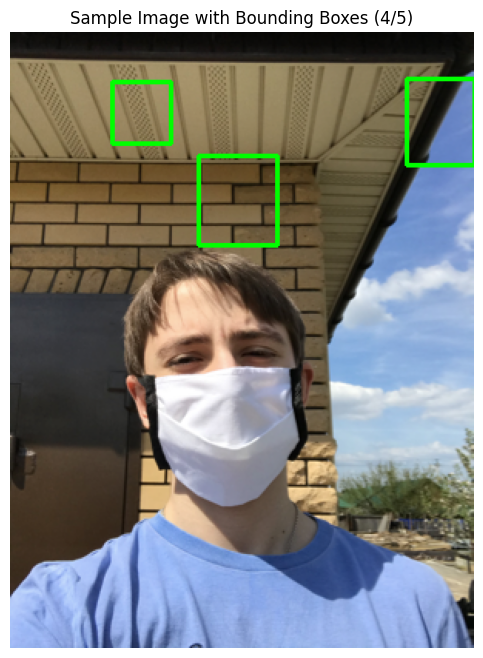

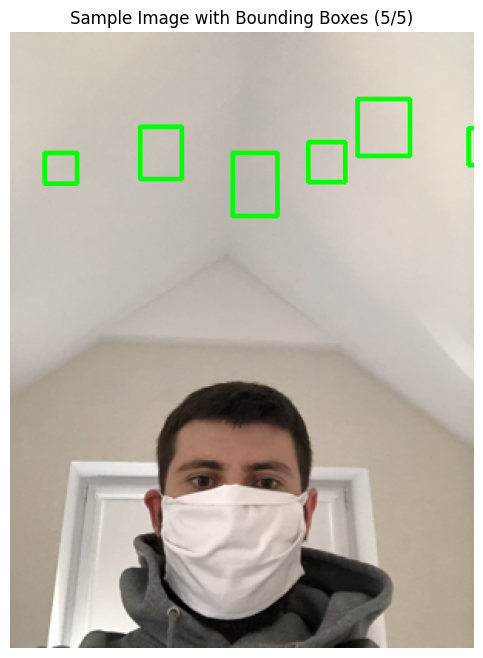

In [10]:


xml_folder = "/content/drive/MyDrive/mask/annotations"
image_folder = "/content/drive/MyDrive/mask/images"

# list of XML and image files
xml_files = os.listdir(xml_folder)
image_files = os.listdir(image_folder)

#  number of samples to display
num_samples_to_display = 5

# Randomly select and display five samples from both folders
for i in range(num_samples_to_display):
    # Select a random sample from the dataset
    random_sample_index = random.randint(0, len(xml_files) - 1)

    # Get the paths to the XML and image files
    sample_xml_file = os.path.join(xml_folder, xml_files[random_sample_index])
    sample_image_file = os.path.join(image_folder, image_files[random_sample_index])

    # Load and display the image
    image = cv2.imread(sample_image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Parse the XML file (modify this part to your XML format)
    tree = ET.parse(sample_xml_file)
    root = tree.getroot()

    # Visualize the image with bounding boxes (if applicable)
    for obj in root.findall("object"):
        box = obj.find("bndbox")
        x_min = int(box.find("xmin").text)
        y_min = int(box.find("ymin").text)
        x_max = int(box.find("xmax").text)
        y_max = int(box.find("ymax").text)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Sample Image with Bounding Boxes ({i+1}/{num_samples_to_display})")
    plt.axis('off')
    plt.show()


In [11]:


# paths to the dataset folders
image_folder = "/content/drive/MyDrive/mask/images"

# list of image files
image_files = os.listdir(image_folder)

# Data Statistics
num_images = len(image_files)
image_dimensions = []
image_sizes = []

# Calculate image dimensions and sizes
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image_dimensions.append((width, height))
    image_size = os.path.getsize(image_path)
    image_sizes.append(image_size)

# Calculate average image dimensions and size
average_width = np.mean([dim[0] for dim in image_dimensions])
average_height = np.mean([dim[1] for dim in image_dimensions])
average_size = np.mean(image_sizes)

print(f"Number of Images: {num_images}")
print(f"Average Image Width: {average_width:.2f} pixels")
print(f"Average Image Height: {average_height:.2f} pixels")
print(f"Average Image Size: {average_size:.2f} bytes")


Number of Images: 853
Average Image Width: 370.59 pixels
Average Image Height: 309.29 pixels
Average Image Size: 488055.41 bytes


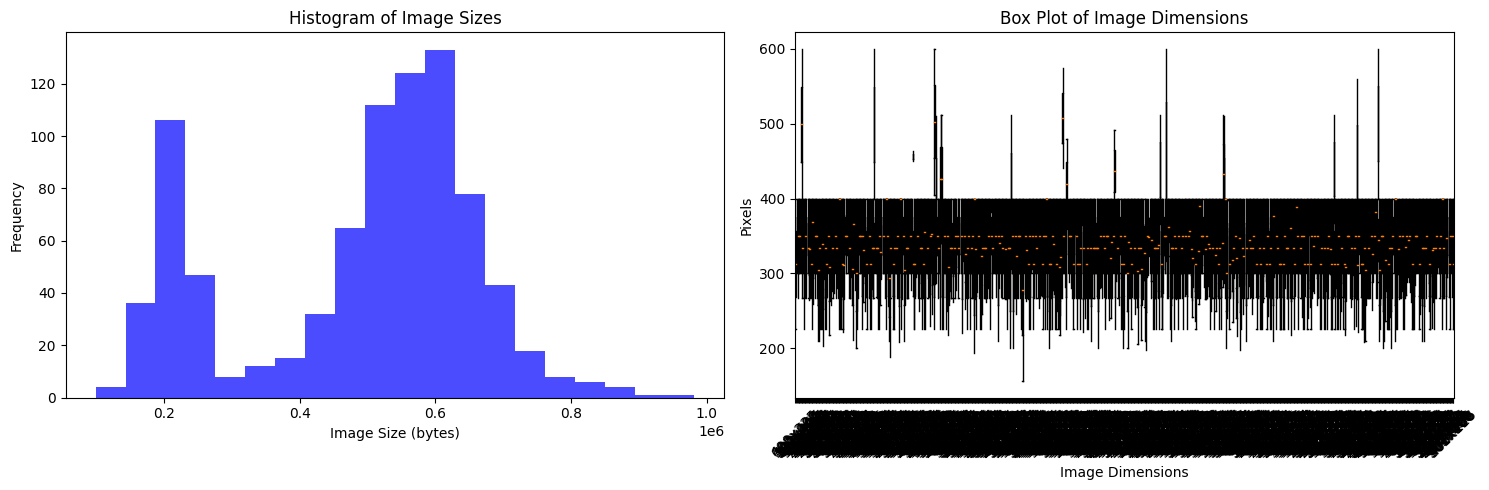

In [12]:


# Create subplots
fig, ( ax2, ax3) = plt.subplots(1, 2, figsize=(15, 5))



# Histogram for Image Sizes
ax2.hist(image_sizes, bins=20, color='blue', alpha=0.7)
ax2.set_xlabel("Image Size (bytes)")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of Image Sizes")

# Box Plot for Image Dimensions
dimensions = [f"{dim[0]}x{dim[1]}" for dim in image_dimensions]
ax3.boxplot(image_dimensions)
ax3.set_xticklabels(dimensions, rotation=45)
ax3.set_xlabel("Image Dimensions")
ax3.set_ylabel("Pixels")
ax3.set_title("Box Plot of Image Dimensions")

plt.tight_layout()
plt.show()







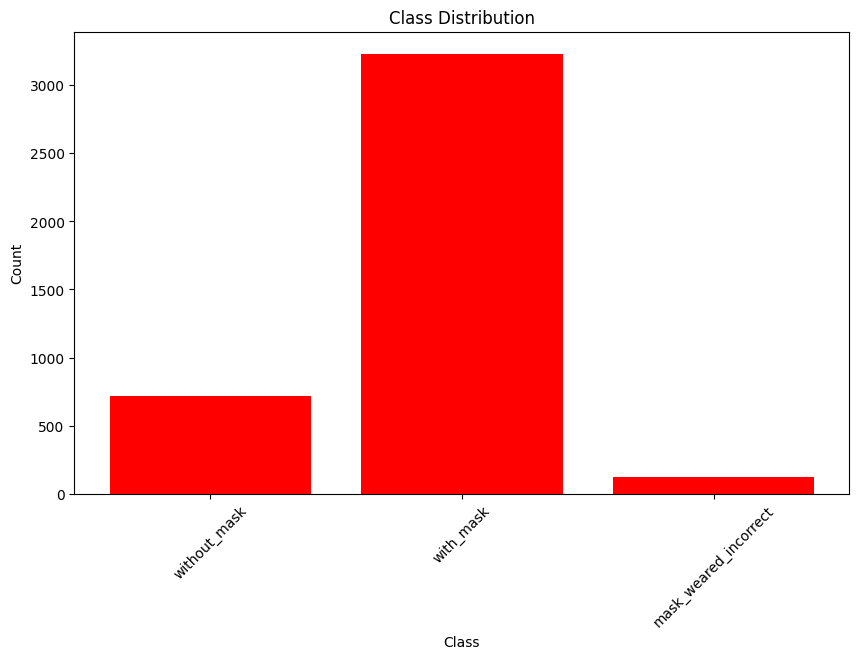

In [13]:


image_folder = "/content/drive/MyDrive/mask"
xml_folder = "/content/drive/MyDrive/mask/annotations"

# list of XML files
xml_files = os.listdir(xml_folder)

#  dictionary to store class counts
class_counts = {}

# Parse XML files and count class occurrences
for xml_file in xml_files:
    xml_path = os.path.join(xml_folder, xml_file)

    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()

    #  class label is stored within an <object> tag
    for obj in root.findall("object"):
        class_name = obj.find("name").text

        # Update the class count
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='red')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [14]:
image_folder

'/content/drive/MyDrive/mask'

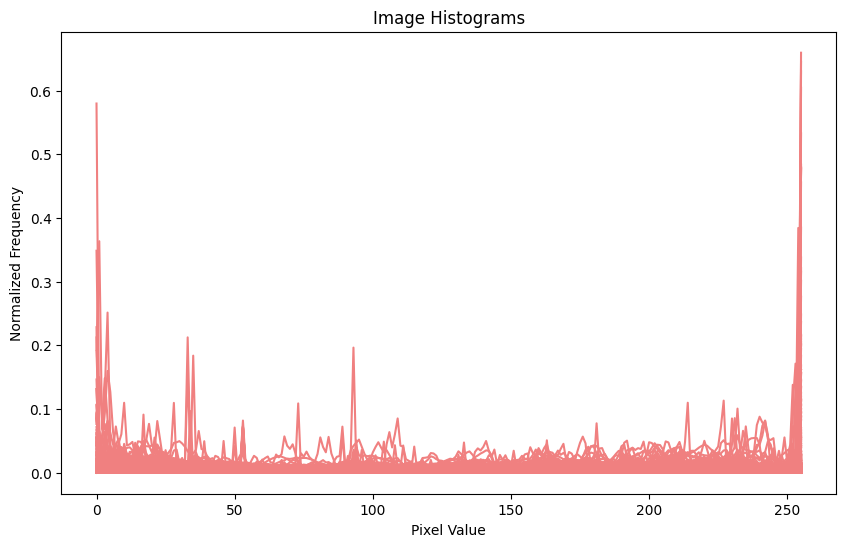

In [15]:



image_folder = "/content/drive/MyDrive/mask/images"

# list of image files
image_files = os.listdir(image_folder)

#  lists to store histograms
histograms = []

# Create histograms for each image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalize the histogram
    histogram /= histogram.sum()

    histograms.append(histogram)

# Plot the histograms
plt.figure(figsize=(10, 6))
for histogram in histograms:
    plt.plot(histogram, color='lightcoral')
plt.xlabel("Pixel Value")
plt.ylabel("Normalized Frequency")
plt.title("Image Histograms")
plt.show()


Data preprocessing

In [16]:
import os
import xml.etree.ElementTree as ET

# Define the path to your annotation folder
annotation_folder = '/content/drive/MyDrive/mask/annotations'

# Create lists to store annotations
annotations = []

# Loop through XML files in the annotation folder
for xml_file in os.listdir(annotation_folder):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(annotation_folder, xml_file)

        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract annotation information from the XML
        annotation_data = {
            'filename': os.path.splitext(xml_file)[0] + '.png',  # Assuming image filenames match XML filenames
            'objects': []
        }

        for object_elem in root.findall('object'):
            object_data = {}
            object_data['name'] = object_elem.find('name').text  # Class label (mask or no mask)
            bbox = object_elem.find('bndbox')
            object_data['xmin'] = int(bbox.find('xmin').text)
            object_data['ymin'] = int(bbox.find('ymin').text)
            object_data['xmax'] = int(bbox.find('xmax').text)
            object_data['ymax'] = int(bbox.find('ymax').text)

            annotation_data['objects'].append(object_data)

        annotations.append(annotation_data)

# Now, 'annotations' contains a list of dictionaries, each representing annotation data for an image.

# You can access the annotation information as needed, e.g., to extract class labels or bounding box coordinates.


In [17]:
import os
import cv2
import numpy as np

# Define paths to your image and annotation folders
image_folder = '/content/drive/MyDrive/mask/images'
annotation_folder = '/content/drive/MyDrive/mask/annotations'

# Create lists to store images and annotations
images = []
annotations = []

# Loop through image files and their corresponding annotations
for image_file in os.listdir(image_folder):
    if image_file.endswith('.png'):
        # Load the image using OpenCV
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)

        # Parse the corresponding XML annotation
        annotation_file = os.path.splitext(image_file)[0] + '.xml'
        annotation_path = os.path.join(annotation_folder, annotation_file)
        # Parse the XML file to extract bounding box coordinates and class labels
        # Here, we assume you have code to parse XML and extract annotations

        # Resize the image to a common size (e.g., 224x224) and normalize it
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize to [0, 1] range

        # Append the preprocessed image and annotations to the lists
        images.append(image)
        annotations.append(annotation_data)  # Replace with your actual annotation data

# Convert lists to NumPy arrays
images = np.array(images)
annotations = np.array(annotations)




In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation within the range
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Random shearing
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill mode for empty pixels
)

# Define the number of augmented samples you want to generate per original image
num_augmented_samples_per_image = 10  # Adjust as needed

# Create a directory to save augmented images and annotations
output_dir = '/content/drive/MyDrive/mask/augmented_data'
os.makedirs(output_dir, exist_ok=True)

# Loop through your original images and apply data augmentation
for i, (image, annotation) in enumerate(zip(images, annotations)):
    # Expand dimensions to make it compatible with flow() function
    image = np.expand_dims(image, axis=0)

    # Generate augmented images and annotations
    for j, (augmented_image, augmented_annotation) in enumerate(datagen.flow(image, [annotation], batch_size=1)):
        augmented_image = augmented_image[0]  # Remove the batch dimension

        # Save the augmented image and annotation
        augmented_image_path = os.path.join(output_dir, f"augmented_image_{i}_{j}.png")
        cv2.imwrite(augmented_image_path, augmented_image)

        augmented_annotation_path = os.path.join(output_dir, f"augmented_annotation_{i}_{j}.xml")
        # Save the augmented annotation to the XML file
        # You should replace this with code to save the annotations to XML
        # The format and structure of the XML file should match your dataset's requirements

        if j >= num_augmented_samples_per_image:
            break

print(f"Generated {i * num_augmented_samples_per_image} augmented samples.")


Generated 8520 augmented samples.


In [19]:
augmented_data_dir = '/content/drive/MyDrive/mask/augmented_data'
os.makedirs(augmented_data_dir, exist_ok=True)


In [20]:
train_dir = os.path.join(augmented_data_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

test_dir = os.path.join(augmented_data_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

validation_dir = os.path.join(augmented_data_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)


In [21]:
train_images_dir = os.path.join(train_dir, 'images')
os.makedirs(train_images_dir, exist_ok=True)

train_annotations_dir = os.path.join(train_dir, 'annotations')
os.makedirs(train_annotations_dir, exist_ok=True)

test_images_dir = os.path.join(test_dir, 'images')
os.makedirs(test_images_dir, exist_ok=True)

test_annotations_dir = os.path.join(test_dir, 'annotations')
os.makedirs(test_annotations_dir, exist_ok=True)

validation_images_dir = os.path.join(validation_dir, 'images')
os.makedirs(validation_images_dir, exist_ok=True)

validation_annotations_dir = os.path.join(validation_dir, 'annotations')
os.makedirs(validation_annotations_dir, exist_ok=True)


In [23]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate the image by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift the width by up to 10%
    height_shift_range=0.1,  # Randomly shift the height by up to 10%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Horizontal flip
    vertical_flip=False  # Vertical flip
)

# Apply data augmentation to your images
augmented_images = []
for image in images:
    augmented_image = datagen.random_transform(image)
    augmented_images.append(augmented_image)

# Convert the augmented images to a NumPy array
augmented_images = np.array(augmented_images)


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, annotations, test_size=0.2, random_state=42)


In [25]:
len(X_train),len(y_train),len(X_test),len(y_test)

(682, 682, 171, 171)

In [26]:
X_test

array([[[[0.66853879, 0.57731242, 0.55021258],
         [0.64799793, 0.54962473, 0.52936743],
         [0.62497896, 0.51945892, 0.51205103],
         ...,
         [0.11759142, 0.1293445 , 0.12341672],
         [0.11978901, 0.13366763, 0.12439427],
         [0.13414596, 0.14828044, 0.16226999]],

        [[0.66945071, 0.57167992, 0.53758651],
         [0.64890985, 0.54399222, 0.51972483],
         [0.63144597, 0.51938151, 0.50523992],
         ...,
         [0.12455009, 0.14026757, 0.13242443],
         [0.1266081 , 0.14698736, 0.13778978],
         [0.12439066, 0.14163801, 0.15067611]],

        [[0.67036263, 0.56917754, 0.53083637],
         [0.64982177, 0.54447873, 0.51058016],
         [0.63481302, 0.5230047 , 0.49816339],
         ...,
         [0.12211724, 0.13626714, 0.12748034],
         [0.12438721, 0.14337074, 0.13213608],
         [0.12686425, 0.14469619, 0.14394711]],

        ...,

        [[0.03924656, 0.03924656, 0.03529671],
         [0.03942478, 0.04243916, 0.03696912]

In [27]:
y_test

array([{'filename': 'maksssksksss99.png', 'objects': [{'name': 'mask_weared_incorrect', 'xmin': 181, 'ymin': 54, 'xmax': 273, 'ymax': 162}, {'name': 'with_mask', 'xmin': 99, 'ymin': 87, 'xmax': 176, 'ymax': 165}, {'name': 'with_mask', 'xmin': 289, 'ymin': 99, 'xmax': 355, 'ymax': 233}]},
       {'filename': 'maksssksksss99.png', 'objects': [{'name': 'mask_weared_incorrect', 'xmin': 181, 'ymin': 54, 'xmax': 273, 'ymax': 162}, {'name': 'with_mask', 'xmin': 99, 'ymin': 87, 'xmax': 176, 'ymax': 165}, {'name': 'with_mask', 'xmin': 289, 'ymin': 99, 'xmax': 355, 'ymax': 233}]},
       {'filename': 'maksssksksss99.png', 'objects': [{'name': 'mask_weared_incorrect', 'xmin': 181, 'ymin': 54, 'xmax': 273, 'ymax': 162}, {'name': 'with_mask', 'xmin': 99, 'ymin': 87, 'xmax': 176, 'ymax': 165}, {'name': 'with_mask', 'xmin': 289, 'ymin': 99, 'xmax': 355, 'ymax': 233}]},
       {'filename': 'maksssksksss99.png', 'objects': [{'name': 'mask_weared_incorrect', 'xmin': 181, 'ymin': 54, 'xmax': 273, 'ymax':

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a basic CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: mask and no mask
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your training data
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [29]:
import numpy as np

# Initialize an empty list to store class labels
class_labels = []

# Loop through the annotations to find the correct field for class labels
for annotation in annotations:
    if 'objects' in annotation:
        # Extract class labels from the 'objects' list
        object_labels = [obj['name'] for obj in annotation['objects']]
        class_labels.extend(object_labels)
    else:
        print("Annotation does not contain the 'objects' field:", annotation)

# Display the unique class labels to help identify the correct format
unique_class_labels = set(class_labels)
print("Unique class labels:", unique_class_labels)


Unique class labels: {'mask_weared_incorrect', 'with_mask'}


In [ ]:
X_train.shape, y_train.shape, X_test.shape

In [31]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))


Length of X_train: 682
Length of y_train: 2046


In [ ]:
import numpy as np

# Define a mapping from class labels to numerical values
class_mapping = {'with_mask': 0, 'mask_weared_incorrect': 1}

# Convert the class labels to numerical values
y = np.array([class_mapping[label] for label in class_labels])



In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
import tensorflow as tf


# Convert 'y_train' and 'y_test' to TensorFlow tensors
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Now, you can use 'y_train_tf' and 'y_test_tf' as target labels when calling 'model.fit()'
model.fit(X_train, y_train_tf, epochs=10, batch_size=32, validation_data=(X_test, y_test_tf))


In [ ]:
import numpy as np

# Initialize an empty list to store class labels
class_labels = []

# Loop through the annotations to find the correct field for class labels
for annotation in annotations:
    if 'name' in annotation:
        class_labels.append(annotation['name'])
    else:
        print("Annotation does not contain the 'name' field:", annotation)

# Display the unique class labels to help identify the correct format
unique_class_labels = set(class_labels)
print("Unique class labels:", unique_class_labels)


In [ ]:
import numpy as np

# Assuming 'annotations' is a list of dictionaries with 'name' representing the class label

# Extract the class labels from the 'annotations' list
class_labels = [annotation['name'] for annotation in annotations]

# Convert the class labels to numerical values (e.g., 0 for 'no mask' and 1 for 'mask')
class_mapping = {'with_mask': 0, 'mask_weared_incorrect': 1}
y = np.array([class_mapping[label] for label in class_labels])



In [2]:
import urllib
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset
import os
from PIL import Image
import random
import xml.etree.ElementTree as ET
import time
import requests
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random

In [3]:
# path of images directory
dir_path = '/content/drive/MyDrive/mask/images'

# path of xml files directory
xml_path = '/content/drive/MyDrive/mask/annotations'

# List of Image file name
file_list = os.listdir(dir_path)

# How many image files?
print('There are total {} images.'.format(len(file_list)))

There are total 853 images.


In [4]:
# Helper function for read the data (label and bounding boxes) from xml file
def read_annot(file_name, xml_dir):
    """
    Function used to get the bounding boxes and labels from the xml file
    Input:
        file_name: image file name
        xml_dir: directory of xml file
    Return:
        bbox : list of bounding boxes
        labels: list of labels
    """
    bbox = []
    labels = []

    annot_path = os.path.join(xml_dir, file_name[:-3]+'xml')
    tree = ET.parse(annot_path)
    root = tree.getroot()
    for boxes in root.iter('object'):
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        label = boxes.find('name').text
        bbox.append([xmin,ymin,xmax,ymax])
        if label == 'with_mask':
            label_idx = 2
        else:
            label_idx = 1
        labels.append(label_idx)

    return bbox, labels

# help function for drawing bounding boxes on image
def draw_boxes(img, boxes,labels, thickness=1):
    """
    Function to draw bounding boxes
    Input:
        img: array of img (h, w ,c)
        boxes: list of boxes (int)
        labels: list of labels (int)

    """
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box,label in zip(boxes,labels):
        box = [int(x) for x in box]
        if label == 2:
            color = (0,225,0) # green
        elif label == 1:
            color = (0,0,225) # red
        cv2.rectangle(img, (box[0],box[1]),(box[2],box[3]),color,thickness)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

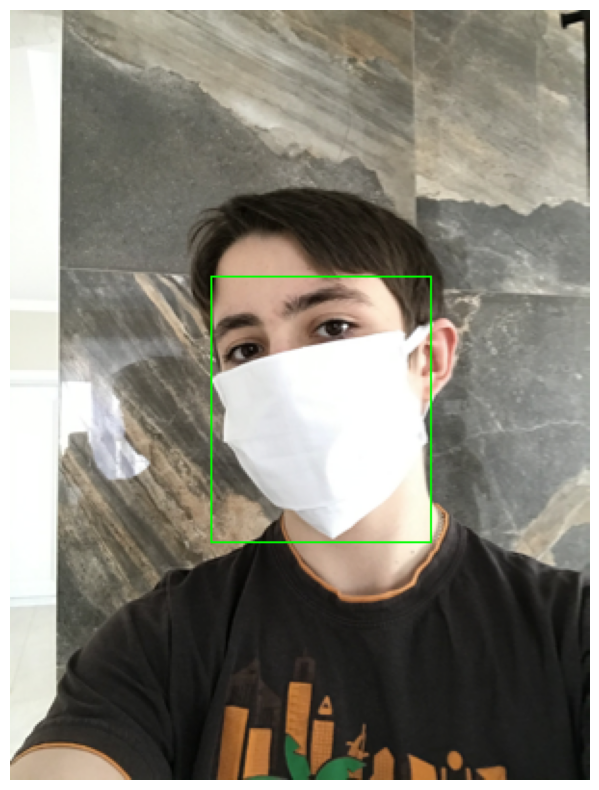

In [5]:
# Get the image randomly
image_name = file_list[random.randint(0,len(file_list))] # random select an image

# Get the bbox and label
bbox, labels  = read_annot(image_name, xml_path)

#draw bounding boxes on the image
img = draw_boxes(plt.imread(os.path.join(dir_path,image_name)), bbox,labels)

# display the image
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.axis('off')
ax.imshow(img)

In [6]:
class image_dataset(Dataset):
    def __init__(self, image_list, image_dir, xml_dir):
        self.image_list = image_list
        self.image_dir = image_dir
        self.xml_dir = xml_dir

    def __getitem__(self, idx):
        """
        Load the image
        """
        img_name = self.image_list[idx]
        img_path = os.path.join(self.image_dir, img_name)
        img = Image.open(img_path).convert('RGB')
        img = transforms.ToTensor()(img)

        """
        build the target dict
        """
        bbox, labels = read_annot(img_name, self.xml_dir)
        boxes = torch.as_tensor(bbox, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        area = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1])
        area = torch.as_tensor(area, dtype=torch.float32)
        iscrowd = torch.zeros((len(bbox),), dtype=torch.int64)

        target = {}

        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([idx])
        target['area'] = area
        target['iscrowed'] = iscrowd
        return img , target

    def __len__(self):
        return len(self.image_list)

In [7]:
mask_dataset = image_dataset(file_list, dir_path, xml_path)

def collate_fn(batch):
    return tuple(zip(*batch))

mask_loader = DataLoader(mask_dataset,
                        batch_size=2,
                        shuffle=True,
                        num_workers=2,
                        collate_fn=collate_fn)

In [8]:
# Setting up GPU device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [9]:
# Setting up the model

num_classes = 3 # background, without_mask, with_mask

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 150MB/s]


In [10]:
# Setting the optimizer, lr_scheduler, epochs

params = [p for p in model.parameters() if p.requires_grad]
#optimizer = torch.optim.Adam(params, lr=0.01)
optimizer = torch.optim.SGD(params, lr=0.01,momentum=0.9, weight_decay=0.0005)
#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=3,gamma=0.1)
num_epochs=30

In [11]:
# Main training function
loss_list = []

for epoch in range(num_epochs):
    print('Starting training....{}/{}'.format(epoch+1, num_epochs))
    loss_sub_list = []
    start = time.time()
    for images, targets in mask_loader:
        images = list(image.to(device) for image in images)
        targets = [{k:v.to(device) for k,v in t.items()} for t in targets]

        model.train()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        loss_sub_list.append(loss_value)

        # update optimizer and learning rate
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        #lr_scheduler.step()
    end = time.time()

    #print the loss of epoch
    epoch_loss = np.mean(loss_sub_list)
    loss_list.append(epoch_loss)
    print('Epoch loss: {:.3f} , time used: ({:.1f}s)'.format(epoch_loss, end-start))

Starting training....1/30
Epoch loss: 0.394 , time used: (279.2s)
Starting training....2/30
Epoch loss: 0.270 , time used: (272.5s)
Starting training....3/30
Epoch loss: 0.242 , time used: (276.1s)
Starting training....4/30
Epoch loss: 0.212 , time used: (272.9s)
Starting training....5/30
Epoch loss: 0.188 , time used: (274.2s)
Starting training....6/30
Epoch loss: 0.168 , time used: (272.7s)
Starting training....7/30
Epoch loss: 0.170 , time used: (276.1s)
Starting training....8/30
Epoch loss: 0.155 , time used: (274.2s)
Starting training....9/30
Epoch loss: 0.137 , time used: (275.4s)
Starting training....10/30
Epoch loss: 0.139 , time used: (280.7s)
Starting training....11/30
Epoch loss: 0.127 , time used: (276.4s)
Starting training....12/30
Epoch loss: 0.121 , time used: (276.7s)
Starting training....13/30
Epoch loss: 0.128 , time used: (272.2s)
Starting training....14/30
Epoch loss: 0.112 , time used: (276.7s)
Starting training....15/30
Epoch loss: 0.106 , time used: (278.1s)
Star

In [13]:
model_path = '/content/drive/MyDrive/your_model.pth'
torch.save(model.state_dict(), model_path)


In [15]:
model_path = '/content/drive/MyDrive/mask/model.pth'
torch.save(model.state_dict(), model_path)